In [41]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from keras.datasets import cifar10

In [42]:
# Convolutional Layer
class ConvLayer:
    def __init__(self, input_shape, kernel_shape):
        input_rows, input_cols, input_channels = input_shape
        filter_count, kernel_rows, kernel_cols = kernel_shape
        self.input_shape = input_shape
        self.kernel_shape = kernel_shape
        self.output_shape = (
            input_rows - kernel_rows + 1,
            input_cols - kernel_cols + 1,
            filter_count,
        )
        self.prev_input = np.zeros(input_shape)
        self.prev_output = np.zeros(self.output_shape)

        # Initialize filters with he initalization
        n_in = input_channels * kernel_rows * kernel_cols
        self.filters = np.random.randn(
            filter_count, input_channels, kernel_rows, kernel_cols
        ) * np.sqrt(2 / n_in)
        self.biases = np.zeros((filter_count, 1))

    def forward(self, input):
        pass

    def backward(self, output_error, learning_rate):
        pass

In [43]:
class MaxPoolLayer:
    def __init__(self, input_shape):
        input_rows, input_cols, input_channels = input_shape
        self.input_shape = input_shape
        self.output_shape = (
            input_rows // 2 + input_rows % 2,
            input_cols // 2 + input_cols % 2,
            input_channels,
        )
        self.prev_input = np.zeros(input_shape)
        self.prev_output = np.zeros(self.output_shape)

    def forward(self, input):
        pass

    def backward(self, output_error, learning_rate):
        pass

In [44]:
class FullyConnectedLayer:
    def __init__(self, input_shape, num_classifications):
        input_rows, input_cols, input_channels = input_shape
        self.input_shape = input_shape
        self.num_classifications = num_classifications

        # There will be no hidden layers
        # To stay consistent with the rust implementation, each column represents an observation
        # This means that for the weights, the number of rows is equal to the number of features

        # Initialize weights with he initalization
        self.weights = np.random.randn(
            num_classifications, input_channels * input_rows * input_cols
        ) * np.sqrt(2 / (input_channels * input_rows * input_cols))
        self.biases = np.zeros((num_classifications, 1))

    def flatten(self, input):
        pass

    def forward(self, input):
        pass

    def backward(self, output_error, learning_rate):
        pass

In [45]:
class CNN:
    def __init__(self, input_shape, num_classifications):
        input_rows, input_cols, input_channels = input_shape
        self.input_shape = input_shape
        self.num_classifications = num_classifications
        self.layers = []

    def forward(self, input):
        layer_input = input
        for layer in self.layers:
            layer_input = layer.forward(layer_input)

    def backward(self, output_error, learning_rate):
        layer_error = output_error
        for layer in reversed(self.layers):
            layer_error = layer.backward(layer_error, learning_rate)

    def train(self, input, labels, learning_rate):
        predictions = self.forward(input)
        output_error = predictions - labels
        self.backward(output_error, learning_rate)

    def predict(self, input):
        return self.forward(input)

    def add_conv_layer(self, kernel_shape):
        prev_shape = (
            self.input_shape if len(self.layers) == 0 else self.layers[-1].output_shape
        )
        self.layers.append(ConvLayer(prev_shape, kernel_shape))

    def add_max_pool_layer(self):
        prev_shape = (
            self.input_shape if len(self.layers) == 0 else self.layers[-1].output_shape
        )
        self.layers.append(MaxPoolLayer(prev_shape))

    def add_fully_connected_layer(self):
        prev_shape = (
            self.input_shape if len(self.layers) == 0 else self.layers[-1].output_shape
        )
        self.layers.append(FullyConnectedLayer(prev_shape, self.num_classifications))

In [46]:
# Lets load the dataset cifar-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Load as numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [47]:
# CNN with 2 CNN layers, 32x3x3 filters, 64x3x3 filters, max pool layer, fully connected layer
# 10 classifications
# 10 epochs
# 32 batch size

num_classifications = 10
input_width = 32
input_height = 32
input_channels = 3

cnn = CNN((input_width, input_height, input_channels), num_classifications)
cnn.add_conv_layer((32, 3, 3))
cnn.add_conv_layer((64, 3, 3))
cnn.add_max_pool_layer()
cnn.add_fully_connected_layer()

In [48]:
def one_hot_encode(y, num_classifications):
    encoded = np.zeros((y.size, num_classifications))
    for i in range(y.shape[0]):
        encoded[i][y[i]] = 1
    return encoded

In [49]:
# Train the model
learning_rate = 0.01  # For now we will use stochastic gradient descent, not adam
batch_size = 32
epochs = 10

for epoch in range(epochs):
    # Shuffle the data
    indices = np.random.permutation(len(x_train))
    # for i in range(0, len(x_train), batch_size):
    for i in range(1):
        # Get the batch
        x_batch = x_train[indices[i : i + batch_size]]
        y_batch = y_train[indices[i : i + batch_size]]

        # Make sure labels are one hot encoded
        y_batch = one_hot_encode(y_batch, num_classifications)
        y_batch = y_batch.T

        # Train the model
        cnn.train(x_batch, y_batch, learning_rate)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

Label: truck
Prediction: NONE


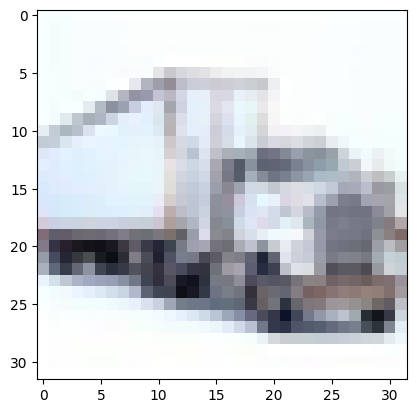

In [71]:
# Interactive test
index = np.random.randint(0, len(x_test))
input = x_test[index]
label = y_test[index][0]
label_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]
prediction = cnn.predict(input)
print("Label:", label_names[label])
print("Prediction:", label_names[prediction] if prediction else "NONE")
plt.imshow(input)